# FOREST COVER TYPE CLASSIFICATION

## Import libraris

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load Dataset and Assign Column Names
The dataset doesn't come with headers, so we assign column names manually.


In [69]:
df = pd.read_csv('covtype.data', header=None, names=columns, low_memory=False)


In [70]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
3,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
4,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581010,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581011,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581012,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581013,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


## Preview the Data
Check the first few rows and basic info.

In [72]:
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
3,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
4,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5


In [73]:
df = df[df['Elevation'] != 'Elevation']  # Drop bad rows

In [74]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
3,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
4,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
5,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
6,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
7,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581010,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581011,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581012,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581013,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


## Check and Handle Missing Values
Remove any rows with missing target values to avoid training errors.


In [75]:
print("Missing values in Cover_Type:", df['Cover_Type'].isna().sum())

# Drop rows with missing target labels
df = df.dropna()


Missing values in Cover_Type: 0


## Dataset Summary
Let's check the shape and class distribution.

In [76]:
print("Dataset shape:", df.shape)
print("\nClass distribution:\n", df['Cover_Type'].value_counts())

Dataset shape: (581012, 55)

Class distribution:
 Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


## Split the Dataset
Split into 80% training and 20% test sets.


In [77]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (464809, 54)
X_test shape: (116203, 54)
y_train shape: (464809,)
y_test shape: (116203,)


## Train the Model
Using RandomForestClassifier with default parameters


In [79]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
rf_model

RandomForestClassifier(random_state=42)

In [81]:
# Predictions
rf_preds = rf_model.predict(X_test)

In [82]:
rf_preds

array(['1', '2', '2', ..., '2', '2', '7'], dtype=object)

## Model Evaluation
Check accuracy, classification report, and confusion matrix.

In [83]:
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))

Accuracy: 0.9551646687262807

Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.93      0.90      0.92      3489
           7       0.97      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



In [84]:
from sklearn.metrics import confusion_matrix

rf_preds = rf_model.predict(X_test)
cm = confusion_matrix(y_test, rf_preds)
print(cm.shape)  # Should be (7, 7) if you have 7 cover types


(7, 7)


In [85]:
y_test = y_test.astype(int)
rf_preds = rf_preds.astype(int)


In [86]:
import numpy as np

labels = [1, 2, 3, 4, 5, 6, 7]
cm = confusion_matrix(y_test, rf_preds, labels=labels)


## Confusion Matrix
Visualize where the model is getting confused between cover types.

## Feature Importance
Visualize which features are most important to the Random Forest model.

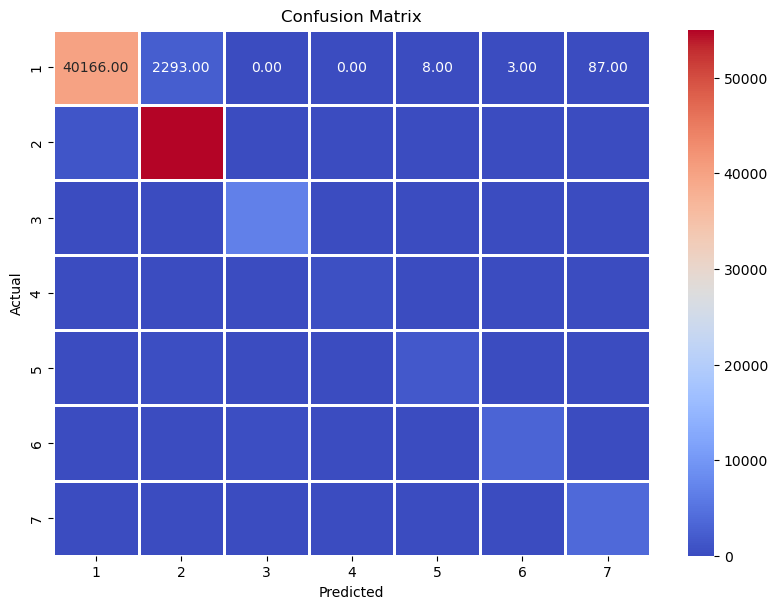

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=labels, yticklabels=labels,linewidth=1)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

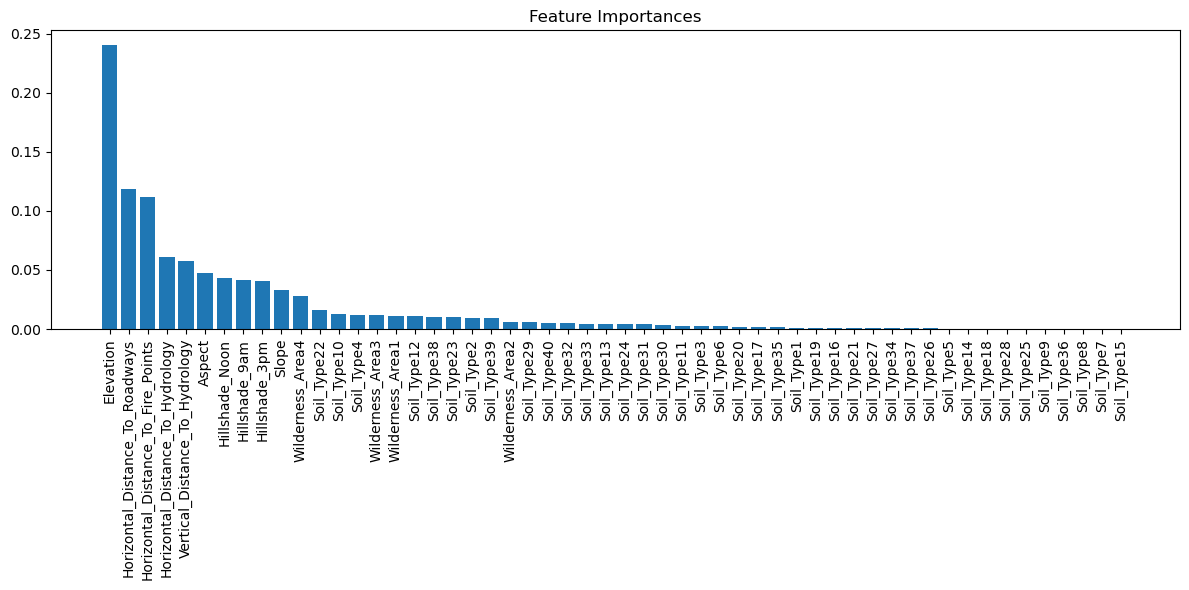

In [88]:
importances = rf_model.feature_importances_
features = X.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), features[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()
